In [1]:
import numpy as np
import pandas as pd
import pandas_profiling

In [2]:
df=pd.read_csv('E:\\task\\telco-customer-churn.csv')

In [3]:
#Воспользуемся pandas_profiling для предварительного анализа нашего датасета
pandas_profiling.ProfileReport(df)

Number of variables,29
Number of observations,20468
Total Missing (%),0.0%
Total size in memory,4.5 MiB
Average record size in memory,232.0 B
Numeric,17
Categorical,9
Boolean,1
Date,0
Text (Unique),0
Rejected,2


In [4]:
##
#По полученным результатам выше видим что имеются два столбца 'noadditionallines' и 'year' которые мы можем исключить в качестве признаков для модели, т.к. они принимают одни и те же значения.
#Также согласно таблице по корреляции между признаками, имеется корреляция между 'totalcallduration' и 'avgcallduration', попробуем оставить только 'avgcallduration'.

In [3]:
y_train1=df['churn']
df.drop(labels=['churn','noadditionallines','year','totalcallduration','callingnum'], axis=1, inplace=True)

In [6]:
pandas_profiling.ProfileReport(df)

Number of variables,24
Number of observations,20468
Total Missing (%),0.0%
Total size in memory,3.7 MiB
Average record size in memory,192.0 B
Numeric,15
Categorical,9
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [4]:

from sklearn.pipeline import make_union, make_pipeline
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, MinMaxScaler,StandardScaler,  Imputer, LabelBinarizer, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

In [5]:
class LabelEncoderPipelineFriendly(LabelEncoder):
    
    def fit(self, X, y=None):
        super(LabelEncoderPipelineFriendly, self).fit(X)
        
    def transform(self, X, y=None):
        return super(LabelEncoderPipelineFriendly, self).transform(X).reshape(-1, 1)

    def fit_transform(self, X, y=None):
        return super(LabelEncoderPipelineFriendly, self).fit(X).transform(X).reshape(-1, 1)

In [6]:

def get_numeric_col(df):
    return df[['age','annualincome','calldroprate','callfailurerate','customerid','monthlybilledamount','numberofcomplaints','numberofmonthunpaid','numdayscontractequipmentplanexpiring','penaltytoswitch','totalminsusedinlastmonth','unpaidbalance','percentagecalloutsidenetwork','avgcallduration','month']]


def get_col_customersuspended(df):
    return df[['customersuspended']]
def get_col_education(df):
    return df[['education']]
def get_col_gender(df):
    return df[['gender']]
def get_col_homeowner(df):
    return df[['homeowner']]
def get_col_maritalstatus(df):
    return df[['maritalstatus']]
def get_col_occupation(df):
    return df[['occupation']]
def get_col_state(df):
    return df[['state']]
def get_col_usesinternetservice(df):
    return df[['usesinternetservice']]
def get_col_usesvoiceservice(df):
    return df[['usesvoiceservice']]

vec = make_union(*[
    
  make_pipeline(FunctionTransformer(get_col_customersuspended, validate=False),  LabelEncoderPipelineFriendly(),OneHotEncoder(sparse=False)),
  make_pipeline(FunctionTransformer(get_col_education, validate=False),  LabelEncoderPipelineFriendly(),OneHotEncoder(sparse=False)),
  make_pipeline(FunctionTransformer(get_col_gender, validate=False),  LabelEncoderPipelineFriendly(),OneHotEncoder(sparse=False)),
  make_pipeline(FunctionTransformer(get_col_homeowner, validate=False),  LabelEncoderPipelineFriendly(),OneHotEncoder(sparse=False)),
  make_pipeline(FunctionTransformer(get_col_maritalstatus, validate=False),  LabelEncoderPipelineFriendly(),OneHotEncoder(sparse=False)),
  make_pipeline(FunctionTransformer(get_col_occupation, validate=False),  LabelEncoderPipelineFriendly(),OneHotEncoder(sparse=False)),
  make_pipeline(FunctionTransformer(get_col_state, validate=False),  LabelEncoderPipelineFriendly(),OneHotEncoder(sparse=False)),
  make_pipeline(FunctionTransformer(get_col_usesinternetservice, validate=False),  LabelEncoderPipelineFriendly(),OneHotEncoder(sparse=False)),
  make_pipeline(FunctionTransformer(get_col_usesvoiceservice, validate=False),  LabelEncoderPipelineFriendly(),OneHotEncoder(sparse=False)),

  make_pipeline(FunctionTransformer(get_numeric_col, validate=False)),

])

In [7]:
x_train1=vec.fit_transform(df)
x_train1.shape

C:\Users\shaim\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shaim\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shaim\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shaim\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

(20468, 84)

In [8]:
import seaborn as sns
%matplotlib inline
#df1=pd.read_csv('E:\\task\\telco-customer-churn.csv')
#g = sns.catplot(x="education", y="churn", data=df1, size=6, kind="bar")
#g.set_ylabels("curn probability")
#g = sns.catplot(x="gender", y="churn", data=df1, size=3, kind="bar")
#g.set_ylabels("curn probability")

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train1, y_train1, test_size=0.1, random_state=42)

In [49]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_union, make_pipeline
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, MinMaxScaler,  Imputer, LabelBinarizer, OneHotEncoder,StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit,StratifiedKFold, KFold, cross_val_score, GridSearchCV, RepeatedStratifiedKFold

In [50]:
#model_log=RandomForestClassifier()
#model_log = tree.DecisionTreeClassifier()
model_log = ExtraTreesClassifier(max_depth=40)
#model_log=AdaBoostClassifier()
#model_log=SGDClassifier(loss='log',random_state=1)
#model_log=LogisticRegression()
model_log.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=40, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [51]:
log_predic=model_log.predict(x_test)
log_predic_proba=model_log.predict_proba(x_test)

In [52]:
metrics.accuracy_score(y_test,log_predic)

0.9892525647288715

In [53]:
metrics.confusion_matrix(y_test,log_predic)

array([[1850,    0],
       [  22,  175]], dtype=int64)

In [54]:
print(metrics.classification_report(y_test,log_predic))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1850
          1       1.00      0.89      0.94       197

avg / total       0.99      0.99      0.99      2047



In [55]:
fpr,tpr,_=metrics.roc_curve(y_test,log_predic_proba[:,1])

Populating the interactive namespace from numpy and matplotlib


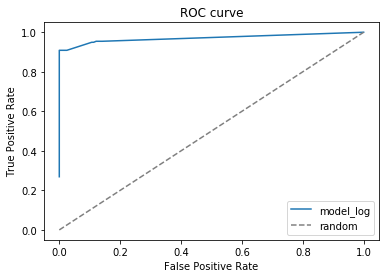

In [56]:
%pylab inline
pylab.plot(fpr,tpr,label='model_log')
pylab.plot([0,1],[0,1],'--',color='grey',label='random')
pylab.xlim([-0.05,1.05])
pylab.ylim([-0.05,1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve')
pylab.legend(loc='lower right')

In [57]:
metrics.roc_auc_score(y_test,log_predic_proba[:,1])

0.9706736177802168

In [58]:
metrics.average_precision_score(y_test,log_predic)

0.8990723083675751

In [59]:
#scorer=metrics.make_scorer(metrics.roc_auc_score)
scorer='roc_auc'

In [60]:
n_fold=10
cv_strategy = StratifiedShuffleSplit(n_splits=n_fold,test_size=0.3, random_state=3)

In [61]:
model_scoring=cross_val_score(model_log,x_train,y_train,scoring=scorer,cv=cv_strategy)
print('CV mean score: {}' .format(model_scoring.mean()),'std: +/-{}' .format(model_scoring.std()))

CV mean score: 0.9114429480803661 std: +/-0.00985024475839326


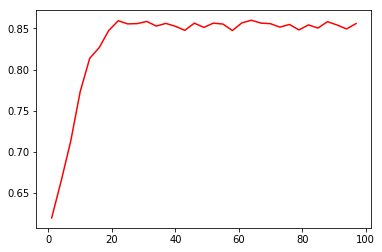

In [27]:
tt1=np.arange(1,100,3)
X=[]
for i in tt1:
    
    X.append(cross_val_score(ExtraTreesClassifier(max_depth=i),x_train,y_train,scoring=scorer,cv=cv_strategy).mean())
plt.plot(tt1,X, c='red')

In [266]:
np.arange(1,100,3)

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49,
       52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97])

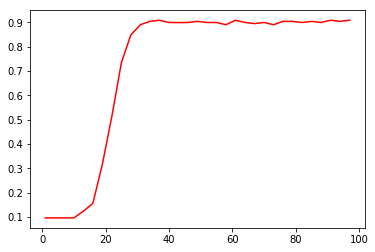

In [62]:
tt1=np.arange(1,100,3)
X=[]
for i in tt1:
    model_log = ExtraTreesClassifier(max_depth=i)
    model_log.fit(x_train, y_train)
    X.append(metrics.average_precision_score(y_test,model_log.predict(x_test)))
plt.plot(tt1,X, c='red')

In [63]:
scorer='roc_auc'
n_fold=5
cv_strategy = StratifiedShuffleSplit(n_splits=n_fold,test_size=0.3, random_state=3)

In [ ]:
model=LogisticRegression()
#1.120,1.121,1.122,1.123,1.124,1.125,1.126,1.127,1.128,1.129
#0.09,0.091,0.092,0.093,0.094,0.095,0.096,0.097
#0.001, 0.01, 0.1, 1.0, 10.0, 100.0
parameter_grid = {'penalty' : ['l1','l2'],
                  'C' : [0.01,0.1,1,10,100],
                  'solver': ['liblinear'],
                  'class_weight' : ['balanced', None],
                }

grid_search = GridSearchCV(model, param_grid=parameter_grid, cv=cv_strategy, scoring='roc_auc')
grid_search.fit(x_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

In [18]:
#model_best=LogisticRegression(**grid_search.best_params_)
model_best=LogisticRegression()
model_best.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

array([0.66018713, 0.67614598, 0.66322014, 0.66910988, 0.65252162])

In [18]:
mean=cross_val_score(model_best,x_train,y_train,scoring=scorer,cv=cv_strategy).mean()
std=cross_val_score(model_best,x_train,y_train,scoring=scorer,cv=cv_strategy).std()
print('CV mean score: {}' .format(mean),'std: +/-{}' .format(std))

CV mean score: 0.6642373999227007 std: +/-0.00800277945372857


In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()

In [27]:
pca = PCA(n_components=84)
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.99)+ 1
d

72

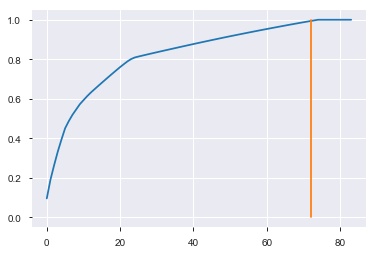

In [28]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.plot([d, d], [0, 1])

In [29]:
pca = PCA(n_components=72)
x_train_pca = pca.fit_transform(x_train)

In [30]:
model_best=LogisticRegression(**grid_search.best_params_)
model_best.fit(x_train_pca, y_train)
mean=cross_val_score(model_best,x_train,y_train,scoring=scorer,cv=cv_strategy).mean()
std=cross_val_score(model_best,x_train,y_train,scoring=scorer,cv=cv_strategy).std()
print('CV mean score: {}' .format(mean),'std: +/-{}' .format(std))

CV mean score: 0.6642370794445986 std: +/-0.008002752201839991


In [38]:
from sklearn.linear_model import ElasticNet
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model=ElasticNet()
parameter_grid = {'alpha' : [0.01,0.1,1,10,100],
                  'l1_ratio' : [0.01,0.1,1,10,100],
                  
        
                 }

grid_search = GridSearchCV(model, param_grid=parameter_grid, cv=folds, scoring='roc_auc')
grid_search.fit(x_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.6646986108901656
Best parameters: {'alpha': 0.01, 'l1_ratio': 0.01}


In [40]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()

parameter_grid = {'n_estimators': [5, 10, 20, 50, 100,1000],
                  'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0]
                 }

grid_search = GridSearchCV(abc, param_grid=parameter_grid, cv=folds, scoring='roc_auc')
grid_search.fit(x_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.7028592857060652
Best parameters: {'learning_rate': 0.01, 'n_estimators': 100}


In [41]:
model_best=AdaBoostClassifier(**grid_search.best_params_)
model_best.fit(x_train, y_train)
mean=cross_val_score(model_best,x_train,y_train,scoring=scorer,cv=cv_strategy).mean()
std=cross_val_score(model_best,x_train,y_train,scoring=scorer,cv=cv_strategy).std()
print('CV mean score: {}' .format(mean),'std: +/-{}' .format(std))

CV mean score: 0.6976656695524651 std: +/-0.0032550707041847653


In [42]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()

parameter_grid = {'n_estimators': [10, 50, 100, 1000],
                  'max_depth': [None, 3, 5, 15]
                 }

grid_search = GridSearchCV(etc, param_grid=parameter_grid, cv=folds, scoring='roc_auc', n_jobs=-1)
grid_search.fit(x_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9973927978161166
Best parameters: {'max_depth': None, 'n_estimators': 1000}


In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

parameter_grid = {'n_estimators': [10, 50, 100, 1000],
                  'max_depth': [None, 3, 5, 15]
                 }

grid_search = GridSearchCV(rfc, param_grid=parameter_grid, cv=folds, scoring='roc_auc', n_jobs=-1)
grid_search.fit(x_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9949426906535838
Best parameters: {'max_depth': None, 'n_estimators': 1000}


In [44]:
model_best=RandomForestClassifier(**grid_search.best_params_)
model_best.fit(x_train, y_train)
mean=cross_val_score(model_best,x_train,y_train,scoring=scorer,cv=cv_strategy).mean()
std=cross_val_score(model_best,x_train,y_train,scoring=scorer,cv=cv_strategy).std()
print('CV mean score: {}' .format(mean),'std: +/-{}' .format(std))

CV mean score: 0.9733043984337593 std: +/-0.003908443174449069


In [96]:
len(x_train),len(x_test),len(y_train),len(y_test)

(13713, 6755, 13713, 6755)